<a href="https://colab.research.google.com/github/Jasonchen0317/CSGY-6613-Assignment/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1a (10 points)
Write the code for generating the gs variable. This is the simplest random variable of the problem and can be generated independent of the others.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.stats import poisson
import statistics

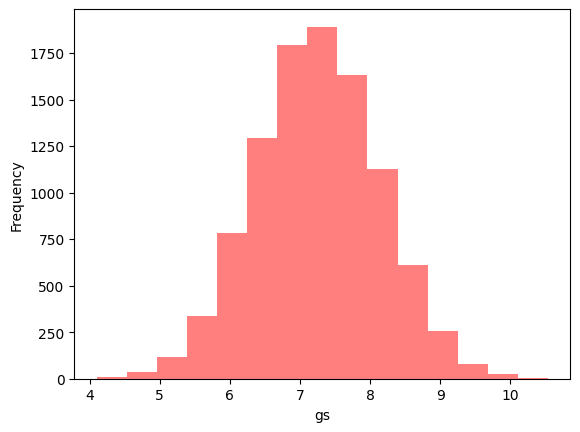

In [2]:
gs = np.random.normal(7.25, 0.875, 10000)
plt.xlabel('gs')
plt.ylabel('Frequency')
plt.hist(gs, bins=15, alpha=0.5, color='r')

plt.show()

Question 1b (20 points)
We have three variables, ak, pp, and ptime. Write the code for generating these variables from Multivate Gaussian distribution and replicate the associated plots.

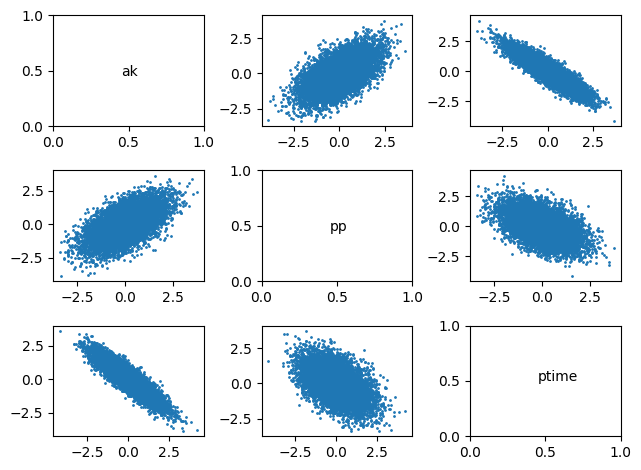

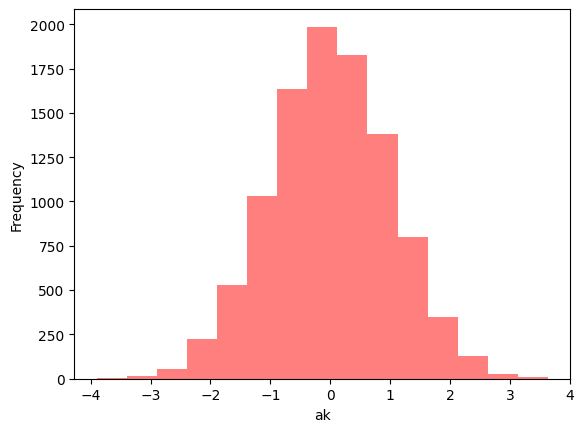

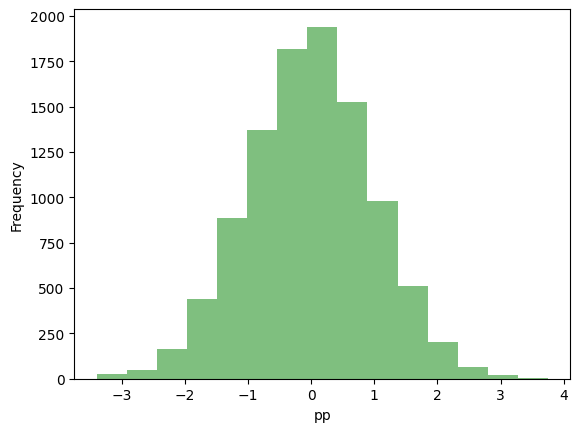

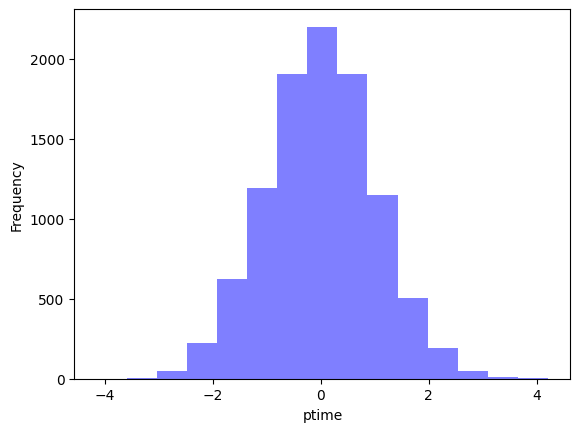

In [3]:
#Normal distribution with mean of 0 and standard deviation of 1 for each variable. The covariance matrix is equivalent to the correlation matrix.
mean = [0, 0, 0]
cov = [[1, 0.6, -0.9], [0.6, 1, -0.5], [-0.9, -0.5, 1]]
data = np.random.multivariate_normal(mean, cov, 10000).T

figure, axis = plt.subplots(3, 3)
figure.tight_layout()

size = 1
axis[0, 0].text(0.45, 0.45, 'ak')
axis[0, 1].scatter(data[0], data[1], s = size)
axis[0, 2].scatter(data[0], data[2], s = size)

axis[1, 1].text(0.45, 0.45, 'pp')
axis[1, 0].scatter(data[1], data[0], s = size)
axis[1, 2].scatter(data[1], data[2], s = size)

axis[2, 2].text(0.45, 0.5, 'ptime')
axis[2, 0].scatter(data[2], data[0], s = size)
axis[2, 1].scatter(data[2], data[1], s = size)

plt.show()

#Histogram of air knots
plt.xlabel('ak')
plt.ylabel('Frequency')
plt.hist(data[0], bins=15, alpha=0.5, color='r')
plt.show()

#Histogram of passes point
plt.xlabel('pp')
plt.ylabel('Frequency')
plt.hist(data[1], bins=15, alpha=0.5, color='g')
plt.show()

#Histogram of practice time
plt.xlabel('ptime')
plt.ylabel('Frequency')
plt.hist(data[2], bins=15, alpha=0.5, color='b')
plt.show()

Question 1c (20 points)
Perform the probability inrtegral transform and replicate the associated plots.

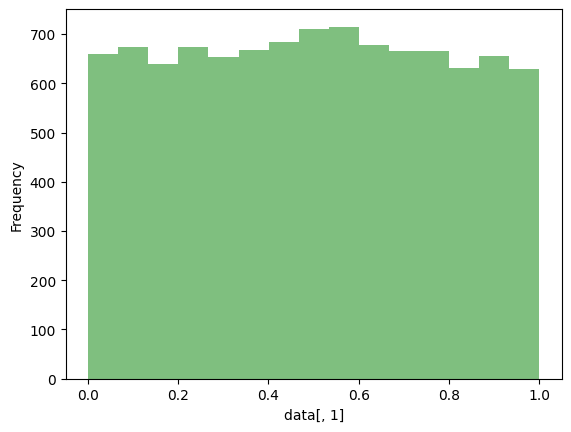

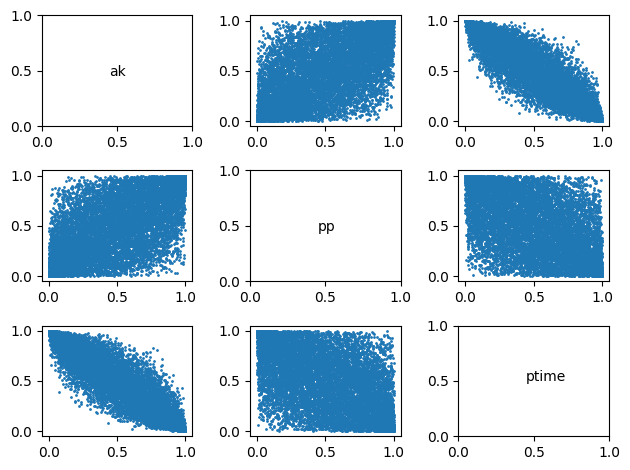

In [4]:
data = norm.cdf(data, 0, 1)
plt.xlabel('data[, 1]')
plt.ylabel('Frequency')
plt.hist(data[1], bins=15, alpha=0.5, color='g')
plt.show()

figure, axis = plt.subplots(3, 3)
figure.tight_layout()

size = 1
axis[0, 0].text(0.45, 0.45, 'ak')
axis[0, 1].scatter(data[0], data[1], s = size)
axis[0, 2].scatter(data[0], data[2], s = size)

axis[1, 1].text(0.45, 0.45, 'pp')
axis[1, 0].scatter(data[1], data[0], s = size)
axis[1, 2].scatter(data[1], data[2], s = size)

axis[2, 2].text(0.45, 0.5, 'ptime')
axis[2, 0].scatter(data[2], data[0], s = size)
axis[2, 1].scatter(data[2], data[1], s = size)

plt.show()

Question 1d (20 points)
Perform the inverse transform sampling.

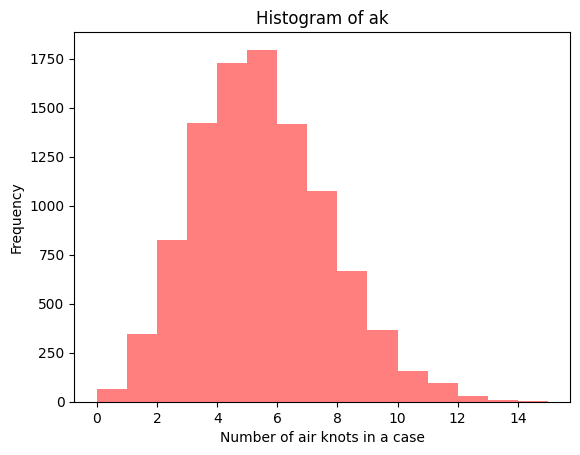

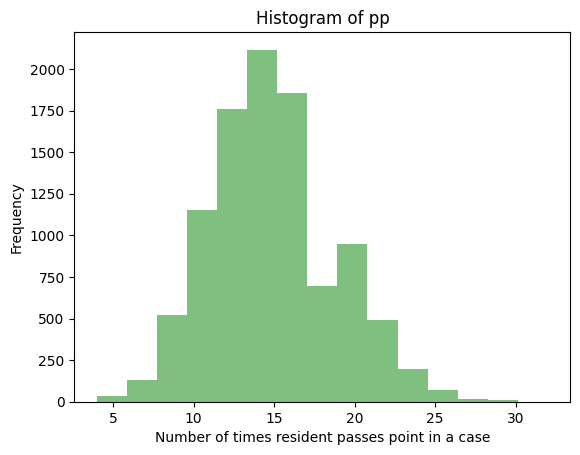

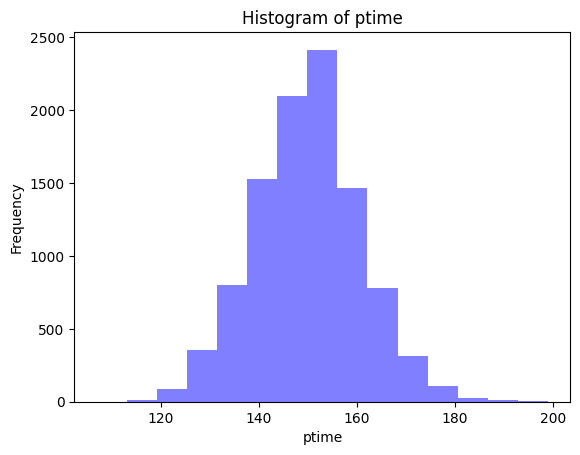

ak, pp: 0.580280082583855
ak, ptime: -0.8880242696670154
pp, ptime: -0.48061920188629953
ak, gs: 0.00509954754328071
pp, gs: 0.0062679415081446305
ptime, gs: 0.0006984173877568654


In [5]:

ak = poisson.ppf(data[0], 5)
plt.xlabel('Number of air knots in a case')
plt.ylabel('Frequency')
plt.title('Histogram of ak')
plt.hist(ak, bins=15, alpha=0.5, color='r')
plt.show()

pp = poisson.ppf(data[1], 15)
plt.xlabel('Number of times resident passes point in a case')
plt.ylabel('Frequency')
plt.title('Histogram of pp')
plt.hist(pp, bins=15, alpha=0.5, color='g')
plt.show()

ptime = poisson.ppf(data[2], 120, 30)
plt.xlabel('ptime')
plt.ylabel('Frequency')
plt.title('Histogram of ptime')
plt.hist(ptime, bins=15, alpha=0.5, color='b')
plt.show()

#checking correlation between ak, pp and ptime
r = np.corrcoef(data[0], data[1])
print('ak, pp: '+str(r[0,1]))
r = np.corrcoef(data[0], data[2])
print('ak, ptime: '+str(r[0,1]))
r = np.corrcoef(data[1], data[2])
print('pp, ptime: '+str(r[0,1]))

r = np.corrcoef(data[0], gs)
print('ak, gs: '+str(r[0,1]))
r = np.corrcoef(data[1], gs)
print('pp, gs: '+str(r[0,1]))
r = np.corrcoef(data[2], gs)
print('ptime, gs: '+str(r[0,1]))


Question 1e (10 points)
Replicate the final plot showcasing the correlations between the variables.

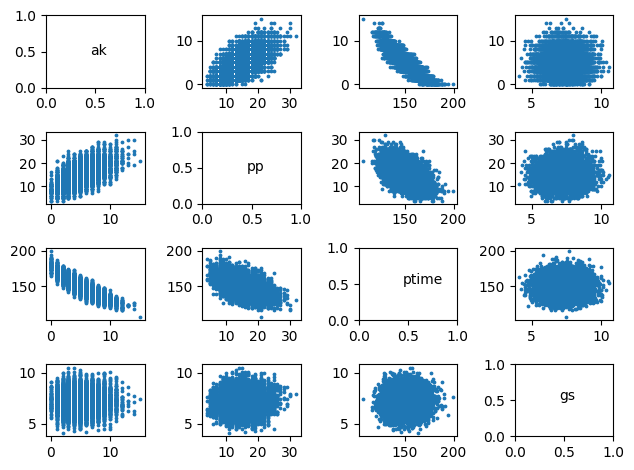

In [6]:
figure, axis = plt.subplots(4, 4)
figure.tight_layout()

size = 3
axis[0, 0].text(0.45, 0.45, 'ak')
axis[0, 1].scatter(pp, ak, s = size)
axis[0, 2].scatter(ptime, ak, s = size)
axis[0, 3].scatter(gs, ak, s = size)

axis[1, 1].text(0.45, 0.45, 'pp')
axis[1, 0].scatter(ak, pp, s = size)
axis[1, 2].scatter(ptime, pp, s = size)
axis[1, 3].scatter(gs, pp, s = size)

axis[2, 2].text(0.45, 0.5, 'ptime')
axis[2, 0].scatter(ak, ptime, s = size)
axis[2, 1].scatter(pp, ptime, s = size)
axis[2, 3].scatter(gs, ptime, s = size)

axis[3, 3].text(0.45, 0.5, 'gs')
axis[3, 0].scatter(ak, gs, s = size)
axis[3, 1].scatter(pp, gs, s = size)
axis[3, 2].scatter(ptime, gs, s = size)

Problem 2 (20 points)